##Synthetic Data Generation for Customer Churn Prediction System





In [191]:

import pandas as pd
import numpy as np

In [192]:
np.random.seed(52)
N=6000

#parameters




* Income level
* Tenure
* Subscription plan
* Contract type
* Monthly chargs
* Auto renewal
* Late payment
* failed transaction
* Customer Id
* Age
* Gender







In [193]:
age = np.random.randint(18,60,N)
customer_id = np.arange(1, N+1)
gender = np.random.choice(['M','F'], N)

tenure = np.random.randint(1,15,N)
failed_transaction = np.random.randint(0,2,N)
late_payment = np.random.randint(0,2,N)
auto_renewal = np.random.randint(0,2,N)
contract_numeric = np.random.randint(0,2,N)
monthly_charge = np.random.randint(50,500,N)
sub_plan_numeric = np.random.randint(1,4,N)
income = np.random.choice(['low','medium','high'], N)
sub_plan = np.random.choice(['basic','standard','premium'], N)
contract = np.random.choice(['monthly','annual'], N)

In [194]:
risk_score = (
    (60 - age) * 0.6 +
    income_numeric * (-25) +
    (15 - tenure) * 18 +
    failed_transaction * 35 +
    late_payment * 30 +
    auto_renewal * (-20) +
    contract_numeric * 15 +
    (monthly_charge / 200) * 35 +
    sub_plan_numeric * (-15)
)


In [195]:
income_map = {'low': 1, 'medium': 2, 'high': 3}
sub_plan_map = {'basic': 1, 'standard': 2, 'premium': 3}
contract_map = {'monthly': 1, 'annual': 2}
income_numeric = np.array([income_map[i] for i in income])
sub_plan_numeric = np.array([sub_plan_map[s] for s in sub_plan])

contract_numeric = np.array([contract_map[c] for c in contract])
risk_score = (
    (60 - age) * 0.6 +
    income_numeric * (-25) +
    (15 - tenure) * 18 +
    failed_transaction * 35 +
    late_payment * 30 +
    auto_renewal * (-20) +
    contract_numeric * 15 +
    (monthly_charge / 200) * 35 +
    sub_plan_numeric * (-15)
)
default_probability = 1 / (1 + np.exp(-risk_score / 40))
default = np.random.binomial(1, default_probability)


In [196]:
data=pd.DataFrame({
    'customer_id':customer_id,
    'age':age,
    'gender':gender,
    'income_numeric':income_numeric,
    'tenure':tenure,
    'sub_plan':sub_plan,
    'contract':contract,
    'monthly_charge':monthly_charge,
    'auto_renewal':auto_renewal,
    'late_payment':late_payment,
    'failed_transaction':failed_transaction,
    'default':default
})

In [197]:
data

,customer_id,age,gender,income_numeric,tenure,sub_plan,contract,monthly_charge,auto_renewal,late_payment,failed_transaction,default
0,1,46,F,2,6,basic,monthly,208,0,1,0,1
1,2,29,F,2,13,basic,monthly,190,0,1,1,1
2,3,31,F,3,6,standard,annual,320,1,1,0,1
3,4,41,F,2,13,standard,annual,214,0,0,1,1
4,5,40,F,1,8,premium,annual,121,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5996,41,M,3,11,premium,annual,426,0,1,1,1
5996,5997,45,F,2,12,basic,monthly,298,1,0,1,1
5997,5998,27,F,1,11,premium,monthly,311,1,0,0,1
5998,5999,20,F,2,11,standard,annual,173,1,1,0,1


In [198]:
data.head()

,customer_id,age,gender,income_numeric,tenure,sub_plan,contract,monthly_charge,auto_renewal,late_payment,failed_transaction,default
0,1,46,F,2,6,basic,monthly,208,0,1,0,1
1,2,29,F,2,13,basic,monthly,190,0,1,1,1
2,3,31,F,3,6,standard,annual,320,1,1,0,1
3,4,41,F,2,13,standard,annual,214,0,0,1,1
4,5,40,F,1,8,premium,annual,121,1,1,1,1


In [199]:
data.tail()

,customer_id,age,gender,income_numeric,tenure,sub_plan,contract,monthly_charge,auto_renewal,late_payment,failed_transaction,default
5995,5996,41,M,3,11,premium,annual,426,0,1,1,1
5996,5997,45,F,2,12,basic,monthly,298,1,0,1,1
5997,5998,27,F,1,11,premium,monthly,311,1,0,0,1
5998,5999,20,F,2,11,standard,annual,173,1,1,0,1
5999,6000,53,F,2,5,basic,annual,251,1,1,1,1


In [200]:
data.describe()

,customer_id,age,income_numeric,tenure,monthly_charge,auto_renewal,late_payment,failed_transaction,default
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,3000.500000,38.325667,2.009000,7.402167,277.121167,0.501167,0.489167,0.495333,0.931500
std,1732.195139,12.143826,0.822211,4.017975,130.451567,0.500040,0.499924,0.500020,0.252623
min,1.000000,18.000000,1.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.000000
25%,1500.750000,28.000000,1.000000,4.000000,166.000000,0.000000,0.000000,0.000000,1.000000
50%,3000.500000,38.000000,2.000000,7.000000,279.000000,1.000000,0.000000,0.000000,1.000000
75%,4500.250000,49.000000,3.000000,11.000000,392.000000,1.000000,1.000000,1.000000,1.000000
max,6000.000000,59.000000,3.000000,14.000000,499.000000,1.000000,1.000000,1.000000,1.000000


In [201]:
data.to_csv("customer_churn_noisy.csv", index=False)



In [202]:
noisy_data=data.copy()

In [203]:
noisy_data.head()

,customer_id,age,gender,income_numeric,tenure,sub_plan,contract,monthly_charge,auto_renewal,late_payment,failed_transaction,default
0,1,46,F,2,6,basic,monthly,208,0,1,0,1
1,2,29,F,2,13,basic,monthly,190,0,1,1,1
2,3,31,F,3,6,standard,annual,320,1,1,0,1
3,4,41,F,2,13,standard,annual,214,0,0,1,1
4,5,40,F,1,8,premium,annual,121,1,1,1,1


In [204]:
noisy_data=data.copy()
age_noise=np.random.randint(-5,20,N)
tenure_noise=np.random.randint(-2,10,N)
monthly_charge_noise=np.random.randint(-10,10,N)
noisy_data['age']+=age_noise
noisy_data['tenure']+=tenure_noise
noisy_data['monthly_charge']+=monthly_charge_noise

In [205]:
noisy_data

,customer_id,age,gender,income_numeric,tenure,sub_plan,contract,monthly_charge,auto_renewal,late_payment,failed_transaction,default
0,1,43,F,2,5,basic,monthly,210,0,1,0,1
1,2,47,F,2,13,basic,monthly,194,0,1,1,1
2,3,31,F,3,6,standard,annual,310,1,1,0,1
3,4,53,F,2,22,standard,annual,211,0,0,1,1
4,5,47,F,1,15,premium,annual,111,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5996,42,M,3,13,premium,annual,417,0,1,1,1
5996,5997,42,F,2,10,basic,monthly,304,1,0,1,1
5997,5998,24,F,1,10,premium,monthly,302,1,0,0,1
5998,5999,31,F,2,18,standard,annual,168,1,1,0,1


In [206]:
noisy_data.shape

(6000, 12)

In [207]:
noisy_data.describe()

,customer_id,age,income_numeric,tenure,monthly_charge,auto_renewal,late_payment,failed_transaction,default
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,3000.500000,45.490500,2.009000,10.894833,276.616167,0.501167,0.489167,0.495333,0.931500
std,1732.195139,14.284511,0.822211,5.329901,130.533560,0.500040,0.499924,0.500020,0.252623
min,1.000000,13.000000,1.000000,-1.000000,40.000000,0.000000,0.000000,0.000000,0.000000
25%,1500.750000,35.000000,1.000000,7.000000,166.000000,0.000000,0.000000,0.000000,1.000000
50%,3000.500000,45.000000,2.000000,11.000000,278.000000,1.000000,0.000000,0.000000,1.000000
75%,4500.250000,56.000000,3.000000,15.000000,392.000000,1.000000,1.000000,1.000000,1.000000
max,6000.000000,78.000000,3.000000,23.000000,508.000000,1.000000,1.000000,1.000000,1.000000


In [208]:
noisy_data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,6000.0,3000.500000,1732.195139,1.0,1500.75,3000.5,4500.25,6000.0
age,6000.0,45.490500,14.284511,13.0,35.00,45.0,56.00,78.0
income_numeric,6000.0,2.009000,0.822211,1.0,1.00,2.0,3.00,3.0
tenure,6000.0,10.894833,5.329901,-1.0,7.00,11.0,15.00,23.0
monthly_charge,6000.0,276.616167,130.533560,40.0,166.00,278.0,392.00,508.0
auto_renewal,6000.0,0.501167,0.500040,0.0,0.00,1.0,1.00,1.0
late_payment,6000.0,0.489167,0.499924,0.0,0.00,0.0,1.00,1.0
failed_transaction,6000.0,0.495333,0.500020,0.0,0.00,0.0,1.00,1.0
default,6000.0,0.931500,0.252623,0.0,1.00,1.0,1.00,1.0


In [209]:
noisy_data.isnull().sum()

customer_id           0
age                   0
gender                0
income_numeric        0
tenure                0
sub_plan              0
contract              0
monthly_charge        0
auto_renewal          0
late_payment          0
failed_transaction    0
default               0
dtype: int64

In [210]:
(noisy_data.isnull().mean()*100).round(2)

customer_id           0.0
age                   0.0
gender                0.0
income_numeric        0.0
tenure                0.0
sub_plan              0.0
contract              0.0
monthly_charge        0.0
auto_renewal          0.0
late_payment          0.0
failed_transaction    0.0
default               0.0
dtype: float64

In [211]:
noisy_data["default"].value_counts(normalize=True)

default
1    0.9315
0    0.0685
Name: proportion, dtype: float64

In [212]:
import matplotlib.pyplot as plt


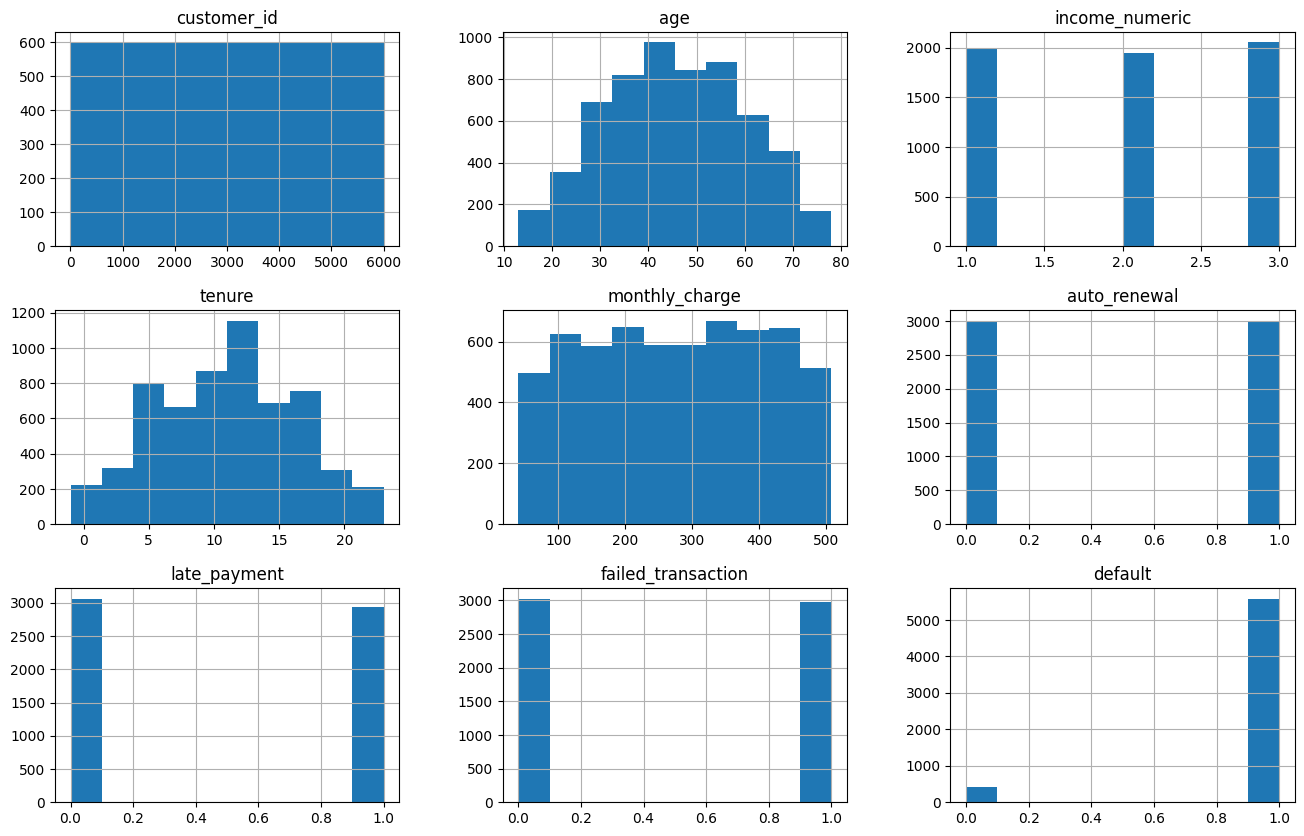

In [213]:
noisy_data.hist(figsize=(16,10))

plt.show()


In [214]:
outliers = np.random.choice(N, 50)
monthly_charge_outliers = np.random.randint(1000, 5000, 50)
noisy_data.loc[outliers, 'monthly_charge'] = monthly_charge_outliers

#Data Cleaning

In [215]:
noisy_data = noisy_data.drop_duplicates()


In [216]:
#outliers IQR
def detect_outlier_iqr(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return df[(df[column]<lower_bound)| (df[column]>upper_bound)]


In [217]:
detect_outlier_iqr(noisy_data,'monthly_charge').shape


(50, 12)

In [218]:
detect_outlier_iqr(noisy_data,'age').shape

(0, 12)

In [219]:
detect_outlier_iqr(noisy_data,'tenure').shape

(0, 12)

In [220]:
detect_outlier_iqr(noisy_data,'income_numeric').shape

(0, 12)

In [221]:
noisy_data.groupby('default')['monthly_charge'].mean()

default
0    225.919708
1    303.376991
Name: monthly_charge, dtype: float64

In [222]:
import seaborn as sns

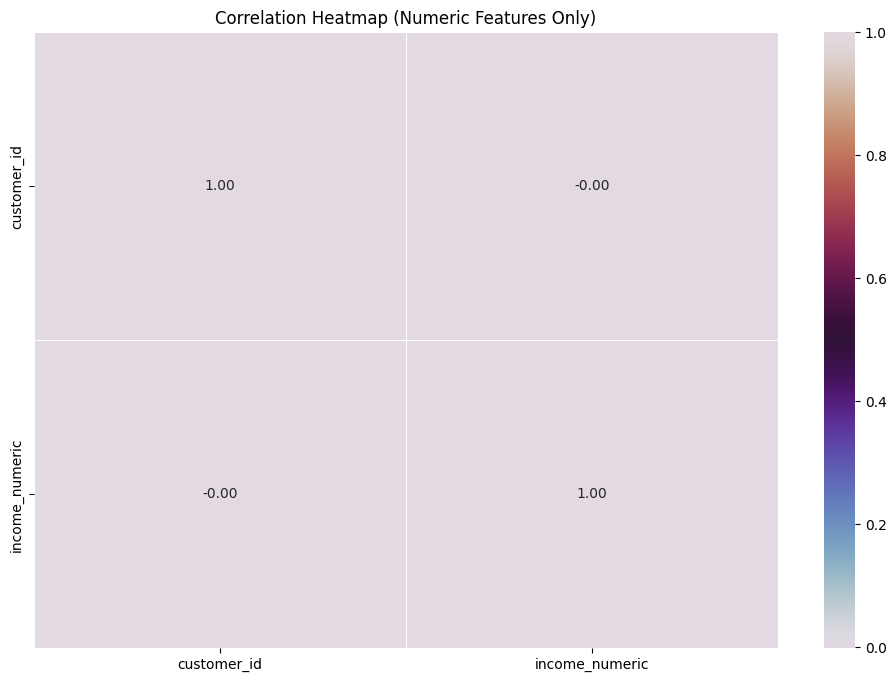

In [223]:
numeric_data = noisy_data.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,8))
sns.heatmap(
    numeric_data.corr(),
    annot=True,
    fmt=".2f",
    cmap="twilight",
    linewidths=0.5
)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


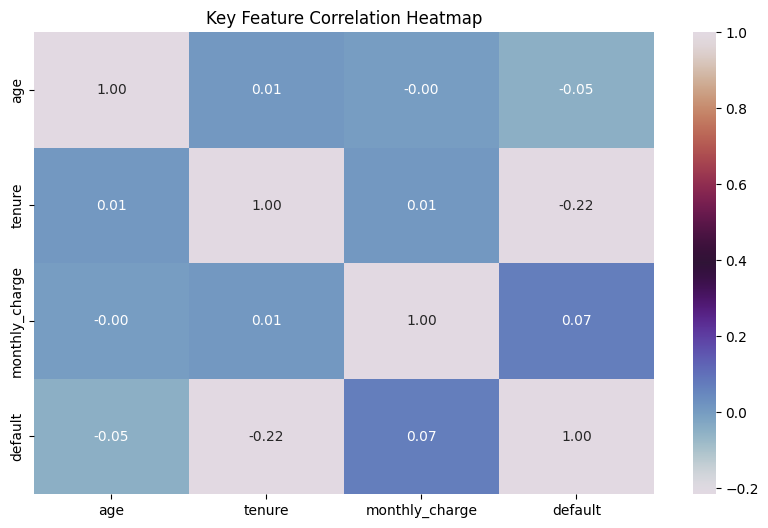

In [224]:
important_cols = [
    'age','tenure','monthly_charge','default'
]

plt.figure(figsize=(10,6))
sns.heatmap(
    noisy_data[important_cols].corr(),
    annot=True,
    fmt=".2f",
    cmap="twilight"
)
plt.title("Key Feature Correlation Heatmap")
plt.show()

In [225]:
num_cols = ['age', 'tenure', 'monthly_charge']

for col in num_cols:
    noisy_data[col] = noisy_data[col].fillna(noisy_data[col].median())

cat_cols = ['gender', 'contract', 'sub_plan']

for col in cat_cols:
    noisy_data[col] = noisy_data[col].fillna(noisy_data[col].mode()[0])

noisy_data.isnull().sum()

customer_id           0
age                   0
gender                0
income_numeric        0
tenure                0
sub_plan              0
contract              0
monthly_charge        0
auto_renewal          0
late_payment          0
failed_transaction    0
default               0
dtype: int64

In [226]:
noisy_data.describe()

,customer_id,age,income_numeric,tenure,monthly_charge,auto_renewal,late_payment,failed_transaction,default
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,3000.500000,45.490500,2.009000,10.894833,298.071167,0.501167,0.489167,0.495333,0.931500
std,1732.195139,14.284511,0.822211,5.329901,288.097244,0.500040,0.499924,0.500020,0.252623
min,1.000000,13.000000,1.000000,-1.000000,40.000000,0.000000,0.000000,0.000000,0.000000
25%,1500.750000,35.000000,1.000000,7.000000,166.750000,0.000000,0.000000,0.000000,1.000000
50%,3000.500000,45.000000,2.000000,11.000000,280.000000,1.000000,0.000000,0.000000,1.000000
75%,4500.250000,56.000000,3.000000,15.000000,394.000000,1.000000,1.000000,1.000000,1.000000
max,6000.000000,78.000000,3.000000,23.000000,4998.000000,1.000000,1.000000,1.000000,1.000000


In [227]:
noisy_data.to_csv("customer_churn_prevention system.csv", index=False)

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report

In [229]:
x = noisy_data.drop(["default", "customer_id"], axis=1)
y = noisy_data["default"]


In [230]:
x.head()

,age,gender,income_numeric,tenure,sub_plan,contract,monthly_charge,auto_renewal,late_payment,failed_transaction
0,43,F,2,5,basic,monthly,210,0,1,0
1,47,F,2,13,basic,monthly,194,0,1,1
2,31,F,3,6,standard,annual,310,1,1,0
3,53,F,2,22,standard,annual,211,0,0,1
4,47,F,1,15,premium,annual,111,1,1,1


In [231]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5995    1
5996    1
5997    1
5998    1
5999    1
Name: default, Length: 6000, dtype: int32

In [232]:



x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


x_train.shape, x_test.shape

((4800, 12), (1200, 12))

In [233]:
categorical_cols = ['gender', 'contract', 'sub_plan']
numerical_cols = x_train.select_dtypes(include=['int64','float64']).columns


categorical_cols

['gender', 'contract', 'sub_plan']

In [234]:
numerical_cols

Index(['income_numeric', 'charge_per_tenure', 'income_per_family'], dtype='object')

In [235]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numerical_cols)
    ]
)

In [236]:
noisy_data

,customer_id,age,gender,income_numeric,tenure,sub_plan,contract,monthly_charge,auto_renewal,late_payment,failed_transaction,default
0,1,43,F,2,5,basic,monthly,210,0,1,0,1
1,2,47,F,2,13,basic,monthly,194,0,1,1,1
2,3,31,F,3,6,standard,annual,310,1,1,0,1
3,4,53,F,2,22,standard,annual,211,0,0,1,1
4,5,47,F,1,15,premium,annual,111,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5996,42,M,3,13,premium,annual,417,0,1,1,1
5996,5997,42,F,2,10,basic,monthly,304,1,0,1,1
5997,5998,24,F,1,10,premium,monthly,302,1,0,0,1
5998,5999,31,F,2,18,standard,annual,168,1,1,0,1


In [237]:
from sklearn.model_selection import GridSearchCV

In [238]:
import numpy as np

# Clean train data
x_train = x_train.replace([np.inf, -np.inf], np.nan)
x_test  = x_test.replace([np.inf, -np.inf], np.nan)

# Fill missing
for col in x_train.select_dtypes(include=['int64','float64']).columns:
    x_train[col] = x_train[col].fillna(x_train[col].median())
    x_test[col]  = x_test[col].fillna(x_test[col].median())


In [239]:
pipeline_logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=5000, class_weight="balanced"))
])

# ---------- GRID PARAMETERS ----------
log_param = {
    "classifier__C": [0.01, 0.1, 1, 10, 50],
    "classifier__solver": ["liblinear"]
}

# ---------- GRID SEARCH ----------
log_grid = GridSearchCV(
    pipeline_logreg,
    log_param,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

log_grid.fit(x_train, y_train)

print("Best Logistic Params :", log_grid.best_params_)

best_log_model = log_grid.best_estimator_

Best Logistic Params : {'classifier__C': 10, 'classifier__solver': 'liblinear'}


In [240]:
models = {

    "Logistic Regression": LogisticRegression(
        max_iter=5000,
        class_weight="balanced",
        solver="liblinear",
        C=10
    ),

    "Decision Tree": DecisionTreeClassifier(
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight="balanced",
        random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=500,
        max_depth=15,
        min_samples_split=5,
        class_weight="balanced",
        random_state=42
    )
}


In [241]:
LogisticRegression(class_weight="balanced", max_iter=5000)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [242]:
RandomForestClassifier(class_weight="balanced")



,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [243]:
from sklearn.linear_model import LogisticRegression

lr_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(
        max_iter=5000,
        class_weight="balanced"
    ))
])

lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.665


In [244]:

X["charge_per_tenure"] = X["monthly_charge"] / (X["tenure"] + 1)
X["income_per_family"] = X["income_numeric"] / (X["tenure"] + 1)

In [245]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=300)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", model)
])

pipeline.fit(x_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [246]:
from sklearn.metrics import roc_auc_score

probs = pipeline.predict_proba(x_test)[:,1]
print("ROC AUC:", roc_auc_score(y_test, probs))


ROC AUC: 0.7389829399188446


In [247]:
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    pipeline.fit(x_train, y_train)

    acc = pipeline.score(x_test, y_test)
    print(f"{name}: {acc}")

Logistic Regression: 0.6641666666666667
Decision Tree: 0.7458333333333333
Random Forest: 0.9058333333333334


In [248]:
y_prob = pipeline.predict_proba(x_test)[:, 1]
y_pred_custom = (y_prob >= 0.4).astype(int)

print("Custom Threshold (0.4)")
print(classification_report(y_test, y_pred_custom))


Custom Threshold (0.4)
              precision    recall  f1-score   support

           0       0.18      0.06      0.09        82
           1       0.93      0.98      0.96      1118

    accuracy                           0.92      1200
   macro avg       0.56      0.52      0.52      1200
weighted avg       0.88      0.92      0.90      1200



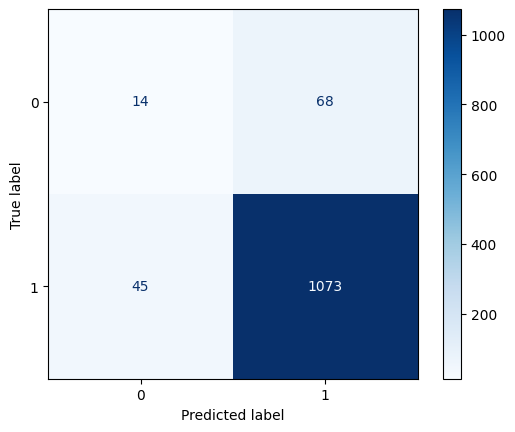

In [249]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(
    pipeline,
    x_test,
    y_test,
    cmap="Blues"
)
plt.show()

In [250]:
from sklearn.metrics import accuracy_score

y_pred = pipeline.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9058333333333334


In [259]:
import joblib
joblib.dump(best_log_model, "churn_model.pkl")



['churn_model.pkl']

In [260]:
import joblib

model = joblib.load("churn_model.pkl")
print(model)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'contract',
                                                   'sub_plan']),
                                                 ('num', StandardScaler(),
                                                  Index(['income_numeric', 'charge_per_tenure', 'income_per_family'], dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced',
                                    max_iter=5000, solver='liblinear'))])


In [261]:
print(y.value_counts(normalize=True))


default
1    0.9315
0    0.0685
Name: proportion, dtype: float64


In [262]:
class_weight="balanced"


In [263]:
model = joblib.load("churn_model.pkl")

def predict_customer(data):
    prediction = model.predict(data)
    probability = model.predict_proba(data)
    return prediction, probability


In [265]:
sample = x_test.iloc[[0]]
print(predict_customer(sample))


(array([1], dtype=int32), array([[0.30050625, 0.69949375]]))
